In [82]:
import sys
sys.path.append("..")

In [83]:
import random
from PIL import Image
from matplotlib.pyplot import imshow
import numpy as np

from feature_extractors.hog import HogFeatureExtractor
from feature_extractors.lbp import LBPFeatureExtractor
from feature_extractors.local_maxima import LocalMaxFeatureExtractor

from datasets.bosch_connector_loader import BoschConnectorPinsDataset

In [84]:
dataset = BoschConnectorPinsDataset()
pos_image_paths, neg_image_paths = dataset.test_data_paths()

example_image, example_patches = dataset.data_for_path(neg_image_paths[random.randint(0, len(neg_image_paths))])

Source image


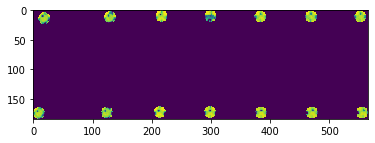

In [85]:
print("Source image")
imshow(Image.fromarray(example_image))

In [86]:
def visualize_patches(special_patches):
	upper = np.concatenate(special_patches[:7], axis=1)
	lower = np.concatenate(special_patches[7:], axis=1)
	img = np.concatenate([lower, upper], axis=0)
	imshow(Image.fromarray(img))

Extracted patches


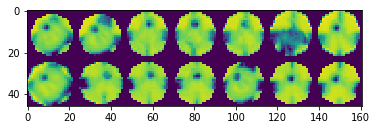

In [87]:
print("Extracted patches")
visualize_patches(example_patches)

HOG features


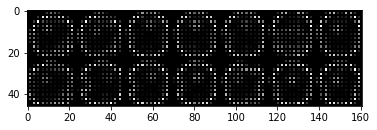

In [88]:
print("HOG features")
from skimage.feature import hog
hog_images = []
for patch in example_patches:
	_, hog_image = hog(patch, orientations=8, pixels_per_cell=(2, 2),
	                 cells_per_block=(2, 2), visualize=True, multichannel=False,
	                 feature_vector=True)
	hog_images.append(hog_image)
visualize_patches(hog_images)

LBP features


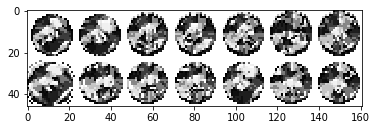

In [89]:
print("LBP features")
from skimage.feature import local_binary_pattern
lbp_features = []
for patch in example_patches:
	lbp_feature = local_binary_pattern(patch, P=8, R=1)
	lbp_features.append(lbp_feature)
visualize_patches(lbp_features)

local maxima features


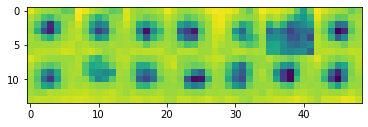

In [90]:
print("local maxima features")
from feature_extractors.local_maxima import LocalMaxFeatureExtractor
localMaximaFeatureExractor = LocalMaxFeatureExtractor(size=6)

lm_features = []
for patch in example_patches:
	columns, rows = localMaximaFeatureExractor.build_extraction_matrix(patch, 6)[:]
	lm_feature = patch[int(rows[0]):int(rows[1]), int(columns[0]):int(columns[1])]
	lm_features.append(lm_feature)
visualize_patches(lm_features)
